# <center> Modèle d'apprentissage Train/Val </center>

In [1]:
from bigml.api import BigML
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
api = BigML(project= 'project/5d94a407eba31d45c8000088')

In [3]:
source = api.create_source('../handson-ml2/trainfull.csv')

In [4]:
origin_dataset = api.create_dataset(source)

In [5]:
train_dataset = api.create_dataset (origin_dataset, {"name": "Train80", "sample_rate":0.8, "seed": "myseed"})

In [6]:
val_dataset = api.create_dataset (origin_dataset, {"name": "Val", "sample_rate":0.8, "seed": "myseed", "out_of_bag": True})

In [ ]:
# Learning Curves Split en 10%
x_ensemble = []
y_ensemble = []
x_deepnet = []
y_deepnet = []
for i in range(1,11): 
    # On crée le nouveau dataset de train à partir du dataset de train80 en itérant les 10 %
    dataset_train_split = api.create_dataset(train_dataset, {"name": "Dataset Train Split" + str(i/10), "sample_rate": i/10, "seed": "my seed"})    
    # On crée le modèle (ensemble) à partir du dataset spliter
    ensemble = api.create_ensemble(dataset_train_split, {"objective_field" : "SeriousDlqin2yrs", "name": "Ensemble " + str(i/10)})
    api.ok(ensemble)
    # On évalue le nouveau modèle (ensemble) qui va nous donner l'AUC
    evaluation = api.create_evaluation(ensemble, val_dataset )
    api.ok(evaluation)
    # On fait la même chose pour deepnet
    deepnet = api.create_deepnet(dataset_train_split, {"objective_field" : "SeriousDlqin2yrs", "name": "Deepnet " + str(i/10)})
    api.ok(deepnet)
    evaluation_deepnet = api.create_evaluation(deepnet, val_dataset )
    api.ok(evaluation_deepnet)
    
    x_ensemble.append(i*10)
    y_ensemble.append(evaluation['object']['result']['model']['average_area_under_roc_curve'])
    x_deepnet.append(i*10)
    y_deepnet.append(evaluation_deepnet['object']['result']['model']['average_area_under_roc_curve'])
    i += 1

print(x_ensemble)
print(y_ensemble)
print(x_deepnet)
print(y_deepnet)

In [ ]:
mean([y_ensemble])
mean([y_deepnet])

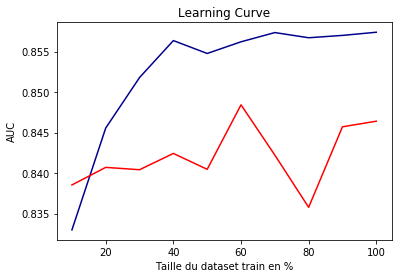

In [10]:
g1 = plt.plot(x_ensemble, y_ensemble, color='darkblue')
plt.ylabel('AUC')
plt.xlabel('Taille du dataset train en %')
g2 = plt.plot(x_deepnet, y_deepnet, color='red')
plt.title('Learning Curve')
plt.show()

*<center>Lancement d'un Modèle ou d'un Deepnet ou autre...</center>*

In [11]:
ensemble = api.create_ensemble(train_dataset, {"objective_field":"SeriousDlqin2yrs"})
api.ok(ensemble)

True

In [12]:
deepnet = api.create_deepnet(train_dataset, {"objective_field":"SeriousDlqin2yrs"})
api.ok(deepnet)

True

*<center> Evaluation du modèle </center>*

In [13]:
evaluation = api.create_evaluation(ensemble, val_dataset)
api.status(evaluation)
api.ok(evaluation)
evaluation = api.get_evaluation(evaluation)
api.pprint(evaluation['object']['result'])

{   'class_names': ['0', '1'],
    'mode': {   'accuracy': 0.93143,
                'average_area_under_pr_curve': 0,
                'average_area_under_roc_curve': 0,
                'average_balanced_accuracy': 0.5,
                'average_f_measure': 0.48225,
                'average_kendalls_tau_b': 0,
                'average_ks_statistic': 0,
                'average_max_phi': 0,
                'average_phi': 0,
                'average_precision': 0.46572,
                'average_recall': 0.5,
                'average_spearmans_rho': 0,
                'confusion_matrix': [[27943, 0], [2057, 0]],
                'per_class_statistics': [   {   'accuracy': 0.93143,
                                                'balanced_accuracy': 0.5,
                                                'class_name': '0',
                                                'f_measure': 0.9645,
                                                'phi_coefficient': 0,
                                    

                                                                       0.97334],
                                                                   [   0.55393,
                                                                       0.58691,
                                                                       0.97215],
                                                                   [   0.55857,
                                                                       0.59178,
                                                                       0.97153],
                                                                   [   0.5686,
                                                                       0.60226,
                                                                       0.9702],
                                                                   [   0.57067,
                                                                       0.60444,
                                      

                                                                       0.5326],
                                                                   [   0.9771,
                                                                       0.98976,
                                                                       0.53],
                                                                   [   0.9794,
                                                                       0.99112,
                                                                       0.51],
                                                                   [   0.98057,
                                                                       0.99188,
                                                                       0.5],
                                                                   [   0.98233,
                                                                       0.9927,
                                                  

                                                                   [   0.91313,
                                                                       1.0334,
                                                                       0.79],
                                                                   [   0.91683,
                                                                       1.03243,
                                                                       0.78082],
                                                                   [   0.9204,
                                                                       1.03178,
                                                                       0.77],
                                                                   [   0.92067,
                                                                       1.03171,
                                                                       0.76783],
                                            

                                                                     [   0.55393,
                                                                         0.10598,
                                                                         0.97215],
                                                                     [   0.55857,
                                                                         0.10744,
                                                                         0.97153],
                                                                     [   0.5686,
                                                                         0.11133,
                                                                         0.9702],
                                                                     [   0.57067,
                                                                         0.11181,
                                                                         0.97],
                 

                                                                         0.92598],
                                                                     [   0.77503,
                                                                         0.24988,
                                                                         0.92228],
                                                                     [   0.77987,
                                                                         0.25766,
                                                                         0.92011],
                                                                     [   0.7839,
                                                                         0.26009,
                                                                         0.91837],
                                                                     [   0.7883,
                                                                         0.26544,
              

                                                                                         [   [   25776,
                                                                                                 885,
                                                                                                 1172,
                                                                                                 2167],
                                                                                             0.84],
                                                                                         [   [   25589,
                                                                                                 854,
                                                                                                 1203,
                                                                                                 2354],
                                                                          

                                                                                             0.92895],
                                                                                         [   [   22094,
                                                                                                 464,
                                                                                                 1593,
                                                                                                 5849],
                                                                                             0.9311],
                                                                                         [   [   21994,
                                                                                                 457,
                                                                                                 1600,
                                                                         

                                                                                         [   [   17851,
                                                                                                 269,
                                                                                                 1788,
                                                                                                 10092],
                                                                                             0.96585],
                                                                                         [   [   17705,
                                                                                                 265,
                                                                                                 1792,
                                                                                                 10238],
                                                                     

                                                                     0.99578],
                                                                 [   0.12744,
                                                                     0.99469,
                                                                     0.9954],
                                                                 [   0.15886,
                                                                     0.99284,
                                                                     0.99464],
                                                                 [   0.17367,
                                                                     0.99264,
                                                                     0.99428],
                                                                 [   0.20252,
                                                                     0.99281,
                                                             

                                                                     0.83],
                                                                 [   0.93118,
                                                                     0.96528,
                                                                     0.82],
                                                                 [   0.93211,
                                                                     0.96495,
                                                                     0.81752],
                                                                 [   0.93659,
                                                                     0.96405,
                                                                     0.80794],
                                                                 [   0.93988,
                                                                     0.96328,
                                                                  

                                                                      0.96249],
                                                                  [   0.14439,
                                                                      0.66535,
                                                                      0.96186],
                                                                  [   0.1473,
                                                                      0.67401,
                                                                      0.9604],
                                                                  [   0.1473,
                                                                      0.67634,
                                                                      0.96],
                                                                  [   0.14925,
                                                                      0.6821,
                                                       

                                                                      0.31],
                                                                  [1, 1, None]],
                                                 'spearmans_rho': 0.31565},
                                             {   'accuracy': 0.93573,
                                                 'area_under_pr_curve': 0.3965,
                                                 'area_under_roc_curve': 0.85719,
                                                 'balanced_accuracy': 0.58247,
                                                 'class_name': '1',
                                                 'f_measure': 0.2697,
                                                 'gain_curve': [   [0, 0, 1],
                                                                   [   0.0003,
                                                                       0.00292,
                                                                       0.69],
  

                                                                   [   0.07883,
                                                                       0.47253,
                                                                       0.23335],
                                                                   [   0.0796,
                                                                       0.47691,
                                                                       0.23],
                                                                   [   0.08297,
                                                                       0.48517,
                                                                       0.22],
                                                                   [   0.08393,
                                                                       0.49052,
                                                                       0.21733],
                                           

                                                                       9.29666,
                                                                       0.53722],
                                                                   [   0.0148,
                                                                       9.26303,
                                                                       0.53],
                                                                   [   0.01543,
                                                                       9.1664,
                                                                       0.52702],
                                                                   [   0.01667,
                                                                       8.98396,
                                                                       0.51633],
                                                                   [   0.01727,
                                         

                                                                   [   0.05233,
                                                                       7.05065,
                                                                       0.30812],
                                                                   [   0.05457,
                                                                       7.00262,
                                                                       0.30393],
                                                                   [   0.05577,
                                                                       6.97399,
                                                                       0.3],
                                                                   [   0.0579,
                                                                       6.87656,
                                                                       0.29595],
                                         

                                                                   [   0.84717,
                                                                       1.16147,
                                                                       0.00546],
                                                                   [   1,
                                                                       1,
                                                                       None]],
                                                 'max_phi': [0.40384, 0.27755],
                                                 'negative_cdf': [   [0, 0, 1],
                                                                     [   0.0003,
                                                                         0.00011,
                                                                         0.69],
                                                                     [   0.00303,
                                               

                                                                                                 265],
                                                                                             0.03355],
                                                                                         [   [   1780,
                                                                                                 9861,
                                                                                                 18082,
                                                                                                 277],
                                                                                             0.03534],
                                                                                         [   [   1759,
                                                                                                 9282,
                                                                        

                                                                                             0.09556],
                                                                                         [   [   1436,
                                                                                                 4041,
                                                                                                 23902,
                                                                                                 621],
                                                                                             0.09872],
                                                                                         [   [   1431,
                                                                                                 4015,
                                                                                                 23928,
                                                                       

                                                                                                 286,
                                                                                                 27657,
                                                                                                 1656],
                                                                                             0.47],
                                                                                         [   [   388,
                                                                                                 269,
                                                                                                 27674,
                                                                                                 1669],
                                                                                             0.47854],
                                                                           

                                                                     0.66667,
                                                                     0.62812],
                                                                 [   0.08264,
                                                                     0.65385,
                                                                     0.61131],
                                                                 [   0.08459,
                                                                     0.65169,
                                                                     0.60773],
                                                                 [   0.08799,
                                                                     0.64643,
                                                                     0.60247],
                                                                 [   0.0914,
                                                             

                                                                 [   0.94895,
                                                                     0.10608,
                                                                     0.01368],
                                                                 [   0.95187,
                                                                     0.10486,
                                                                     0.01327],
                                                                 [   0.95625,
                                                                     0.10244,
                                                                     0.01238],
                                                                 [   0.96403,
                                                                     0.09474,
                                                                     0.01],
                                                               

                  'average_ks_statistic': 0,
                  'average_max_phi': 0,
                  'average_phi': -0.00567,
                  'average_precision': 0.49857,
                  'average_recall': 0.49439,
                  'average_spearmans_rho': 0,
                  'confusion_matrix': [[14113, 13830], [1062, 995]],
                  'per_class_statistics': [   {   'accuracy': 0.5036,
                                                  'balanced_accuracy': 0.49439,
                                                  'class_name': '0',
                                                  'f_measure': 0.65462,
                                                  'phi_coefficient': -0.00567,
                                                  'precision': 0.93002,
                                                  'present_in_test_data': True,
                                                  'recall': 0.50506},
                                              {   'accuracy': 0.5036,
  

In [14]:
evaluation2 = api.create_evaluation(deepnet, val_dataset)
api.status(evaluation2)
api.ok(evaluation2)
evaluation2 = api.get_evaluation(evaluation2)
api.pprint(evaluation2['object']['result'])

{   'class_names': ['0', '1'],
    'mode': {   'accuracy': 0.93143,
                'average_area_under_pr_curve': 0,
                'average_area_under_roc_curve': 0,
                'average_balanced_accuracy': 0.5,
                'average_f_measure': 0.48225,
                'average_kendalls_tau_b': 0,
                'average_ks_statistic': 0,
                'average_max_phi': 0,
                'average_phi': 0,
                'average_precision': 0.46572,
                'average_recall': 0.5,
                'average_spearmans_rho': 0,
                'confusion_matrix': [[27943, 0], [2057, 0]],
                'per_class_statistics': [   {   'accuracy': 0.93143,
                                                'balanced_accuracy': 0.5,
                                                'class_name': '0',
                                                'f_measure': 0.9645,
                                                'phi_coefficient': 0,
                                    

                                                                       0.96902],
                                                                   [   0.35787,
                                                                       0.38002,
                                                                       0.96797],
                                                                   [   0.3653,
                                                                       0.38783,
                                                                       0.96749],
                                                                   [   0.37393,
                                                                       0.39684,
                                                                       0.96689],
                                                                   [   0.3895,
                                                                       0.41338,
                                      

                                                                       0.65],
                                                                   [   0.9277,
                                                                       0.95559,
                                                                       0.64495],
                                                                   [   0.9304,
                                                                       0.95759,
                                                                       0.63],
                                                                   [   0.93263,
                                                                       0.95917,
                                                                       0.62],
                                                                   [   0.9345,
                                                                       0.96049,
                                                

                                                                   [   0.75887,
                                                                       1.04919,
                                                                       0.89],
                                                                   [   0.7624,
                                                                       1.04902,
                                                                       0.88839],
                                                                   [   0.7748,
                                                                       1.04821,
                                                                       0.88186],
                                                                   [   0.77843,
                                                                       1.04787,
                                                                       0.88],
                                            

                                                                         0.97728],
                                                                     [   0.19593,
                                                                         0.02722,
                                                                         0.9768],
                                                                     [   0.2144,
                                                                         0.03257,
                                                                         0.97588],
                                                                     [   0.2249,
                                                                         0.03354,
                                                                         0.9754],
                                                                     [   0.24503,
                                                                         0.03792,
                

                                                                     [   0.95233,
                                                                         0.66164,
                                                                         0.52579],
                                                                     [   0.9538,
                                                                         0.67039,
                                                                         0.52],
                                                                     [   0.9555,
                                                                         0.67963,
                                                                         0.51],
                                                                     [   0.95917,
                                                                         0.70297,
                                                                         0.4948],
                     

                                                                                         [   [   25043,
                                                                                                 807,
                                                                                                 1250,
                                                                                                 2900],
                                                                                             0.80305],
                                                                                         [   [   24906,
                                                                                                 797,
                                                                                                 1260,
                                                                                                 3037],
                                                                       

                                                                                         [   [   18687,
                                                                                                 313,
                                                                                                 1744,
                                                                                                 9256],
                                                                                             0.9337],
                                                                                         [   [   18528,
                                                                                                 305,
                                                                                                 1752,
                                                                                                 9415],
                                                                        

                                                                                                 2052,
                                                                                                 26526],
                                                                                             0.98484],
                                                                                         [   [   1220,
                                                                                                 4,
                                                                                                 2053,
                                                                                                 26723],
                                                                                             0.98537],
                                                                                         [   [   866,
                                                                         

                                                                     0.83],
                                                                 [   0.8775,
                                                                     0.97063,
                                                                     0.82659],
                                                                 [   0.88305,
                                                                     0.96997,
                                                                     0.82],
                                                                 [   0.88688,
                                                                     0.96937,
                                                                     0.81424],
                                                                 [   0.89131,
                                                                     0.96899,
                                                                   

                                                                  [   0.00389,
                                                                      0.08213,
                                                                      0.98288],
                                                                  [   0.00486,
                                                                      0.10049,
                                                                      0.98193],
                                                                  [   0.00583,
                                                                      0.11055,
                                                                      0.9815],
                                                                  [   0.00875,
                                                                      0.12912,
                                                                      0.98058],
                                                 

                                                                      0.78295,
                                                                      0.89668],
                                                                  [   0.24988,
                                                                      0.79455,
                                                                      0.89088],
                                                                  [   0.25182,
                                                                      0.79619,
                                                                      0.89],
                                                                  [   0.25474,
                                                                      0.79977,
                                                                      0.88839],
                                                                  [   0.26738,
                                                   

                                             {   'accuracy': 0.93107,
                                                 'area_under_pr_curve': 0.37818,
                                                 'area_under_roc_curve': 0.84645,
                                                 'balanced_accuracy': 0.64054,
                                                 'class_name': '1',
                                                 'f_measure': 0.37673,
                                                 'gain_curve': [   [0, 0, 1],
                                                                   [   0.00043,
                                                                       0.00486,
                                                                       0.64],
                                                                   [   0.00177,
                                                                       0.01653,
                                                                       0.

                                                                       0.02829],
                                                                   [   0.71927,
                                                                       0.95576,
                                                                       0.0274],
                                                                   [   0.7512,
                                                                       0.96208,
                                                                       0.02577],
                                                                   [   0.7946,
                                                                       0.97132,
                                                                       0.02367],
                                                                   [   0.8125,
                                                                       0.97618,
                                        

                                                                       0.23699],
                                                                   [   0.11607,
                                                                       4.87122,
                                                                       0.23],
                                                                   [   0.12093,
                                                                       4.75157,
                                                                       0.22061],
                                                                   [   0.12633,
                                                                       4.59465,
                                                                       0.21345],
                                                                   [   0.1288,
                                                                       4.55195,
                                        

                                                                     [   0.02347,
                                                                         0.01049,
                                                                         0.57825],
                                                                     [   0.025,
                                                                         0.01149,
                                                                         0.57353],
                                                                     [   0.02577,
                                                                         0.01199,
                                                                         0.57088],
                                                                     [   0.02707,
                                                                         0.01274,
                                                                         0.56456],
              

                                                                         0.31579],
                                                                     [   0.08347,
                                                                         0.05347,
                                                                         0.31],
                                                                     [   0.08563,
                                                                         0.05515,
                                                                         0.30295],
                                                                     [   0.08643,
                                                                         0.05594,
                                                                         0.3],
                                                                     [   0.08757,
                                                                         0.05683,
                   

                                                                                                 247],
                                                                                             0.05146],
                                                                                         [   [   1796,
                                                                                                 11088,
                                                                                                 16855,
                                                                                                 261],
                                                                                             0.05359],
                                                                                         [   [   1788,
                                                                                                 10912,
                                                                      

                                                                                         [   [   1163,
                                                                                                 2319,
                                                                                                 25624,
                                                                                                 894],
                                                                                             0.23],
                                                                                         [   [   1149,
                                                                                                 2222,
                                                                                                 25721,
                                                                                                 908],
                                                                          

                                                                                                 1857],
                                                                                             0.61],
                                                                                         [   [   192,
                                                                                                 117,
                                                                                                 27826,
                                                                                                 1865],
                                                                                             0.61125],
                                                                                         [   [   158,
                                                                                                 84,
                                                                              

                                                                 [   0.10404,
                                                                     0.6185,
                                                                     0.60809],
                                                                 [   0.11765,
                                                                     0.62371,
                                                                     0.60513],
                                                                 [   0.12299,
                                                                     0.61707,
                                                                     0.60277],
                                                                 [   0.12786,
                                                                     0.60183,
                                                                     0.6],
                                                                 

                                                                     0.41469,
                                                                     0.33462],
                                                                 [   0.47205,
                                                                     0.41284,
                                                                     0.33],
                                                                 [   0.47496,
                                                                     0.41293,
                                                                     0.32854],
                                                                 [   0.48128,
                                                                     0.40808,
                                                                     0.32],
                                                                 [   0.48566,
                                                                  

                                                                      0.31579],
                                                                  [   0.05347,
                                                                      0.49101,
                                                                      0.31],
                                                                  [   0.05515,
                                                                      0.49976,
                                                                      0.30295],
                                                                  [   0.05594,
                                                                      0.50073,
                                                                      0.3],
                                                                  [   0.05683,
                                                                      0.5051,
                                                        

*<center>Lancer la prediction à partir de notre modèle en demandant les probabilités</center>*

In [15]:
batch_prediction = api.create_batch_prediction(ensemble, val_dataset, {"all_fields": True, "header": True, "probabilities": True})
api.ok(batch_prediction)

True

In [16]:
batch_prediction2 = api.create_batch_prediction(deepnet, val_dataset, {"all_fields": True, "header": True, "probabilities": True})
api.ok(batch_prediction2)

True

*<center>Récupérer la batch prediction au format csv</center>*

In [17]:
api.download_batch_prediction(batch_prediction, filename='../handson-ml2/my_predictionsValEnsemble.csv')

'../handson-ml2/my_predictionsValEnsemble.csv'

In [18]:
api.download_batch_prediction(batch_prediction2, filename='../handson-ml2/my_predictionsValDeepnet.csv')

'../handson-ml2/my_predictionsValDeepnet.csv'